In [43]:
import pandas as pd
import numpy
import networkx as nx 
import dynetx as dn
import matplotlib.pyplot as plt
import random
from alive_progress import alive_bar
import time
from collections import defaultdict
import seaborn as sns

## (n, m) Anonymity & Betweenness Centrality

In [2]:
# (n,m) anonymity Implementation

def n_m_anonymity(G):
    
    # Create ego network
    ego_properties = {}
    temp = {}

    # Obtain (n, m) value for each node
    for node in G.nodes():
        ego_net = nx.ego_graph(G, node)
        
        n = ego_net.number_of_nodes()
        m = ego_net.number_of_edges()
        
        ego_properties[node] = (n, m)
    
    # Store nodes as keys and the frequency of its (n,m) in the network as values
    frequency_dict = {}
    for node, (n, m) in ego_properties.items():
        freq_count = sum(1 for props in ego_properties.values() if props == (n, m))
        frequency_dict[node] = freq_count
    
    # for node in ego_properties.keys():
    #     # Todo: select the corresponding key= node in ego_properties
    #     # Remember the corresponding (n,m) tuple
    #     # Go through the entire dictionary values, get the frequency of this (n,m) tuple
    #     # For this key=node, assign the frequency to the value
    #     # loop over all the nodes and do the same
    #     for properties in ego_properties.values():
    #         if properties in frequency_dict:
    #             frequency_dict[properties] += 1
    #         else:
    #             frequency_dict[properties] = 1

    # Calculate the percentage of nodes with unique (n, m) values (frequency of 1)
    unique_count = sum(1 for count in frequency_dict.values() if count == 1)
    total_nodes = G.number_of_nodes()
    percentage_unique = (unique_count / total_nodes) * 100  
    #print("Percentage of nodes with unique (n, m) values:", percentage_unique)
    #print("Number of unique nodes:", unique_count)
    
    return frequency_dict

In [3]:
def betweenness_centra(G):
    
    betweenness_centrality = nx.betweenness_centrality(G)

    betweenness_ranking = {node: centrality for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)}

    # print("Betweenness Centrality Ranking (as dictionary):")
    # print(betweenness_ranking)
    return betweenness_ranking

In [86]:
# Func 6: (n,m) anonymity Adaptation

def n_m_anonymity_normalized(G):
    
    # Create ego network
    ego_properties = {}

    # Obtain (n, m) value for each node
    for node in G.nodes():
        ego_net = nx.ego_graph(G, node)
        
        n = ego_net.number_of_nodes()
        m = ego_net.number_of_edges()
        
        ego_properties[node] = (n, m)
    
    # Store nodes as keys and the frequency of its (n,m) in the network as values
    frequency_dict = {}
    for node, (n, m) in ego_properties.items():
        freq_count = sum(1 for props in ego_properties.values() if props == (n, m))
        frequency_dict[node] = freq_count
    
    unique_count = sum(1 for count in frequency_dict.values() if count == 1)
    total_nodes = G.number_of_nodes()
    percentage_unique = (unique_count / total_nodes) * 100  
    
    # Normalized the uniqueness values
    uniqueness = [freq/len(G) for freq in frequency_dict.values()]
    normalized_uniqueness = [(value - min(uniqueness)/(max(uniqueness) - min(uniqueness)) for value in uniqueness)]
    normalized_uniqueness_dict = {node:normalized_uniqueness[i] for i, node in enumerate(frequency_dict.keys())}
    
    return frequency_dict, normalized_uniqueness_dict

## Toy Network Experiment on Anonymity & Centrality

In [6]:
G = nx.Graph()
G.add_nodes_from(range(0, 200))
num_timestamps = 10

# for timestamp in range(1, num_timestamps+1):
#     edge = random.sample(list(G.nodes()), k=random.randint(50,80))
#     edges = [(u, v, {'timestamp': timestamp}) for u in edge for v in edge if u != v]
#     G.add_edges_from(edges)

for timestamp in range(1, num_timestamps + 1):
    edge = random.sample(list(G.nodes()), k=random.randint(30, 50))
    for u in edge:
        for v in edge:
            if u != v:
                p = random.random()
                if p < 0.5:
                    G.add_edge(u, v, timestamp=timestamp)

print(G.number_of_nodes(), G.number_of_edges())

200 4798


In [7]:
# Get Top 10% and Last 10% of the nodes in betweeness ranking
rank = betweenness_centra(G)

top_10 = list(rank.keys())[:int(0.1 * len(rank))]
last_10 = list(rank.keys())[int(0.9 * len(rank)):]
mid_10 = list(rank.keys())[int(0.4 * len(rank)) : int(0.5 * len(rank))]

In [10]:
# Get (n, m) anonymity and find top 10% & last 10% of nodes with their (n, m) anonymity
temp = n_m_anonymity2(G)
top_10_percent_nodes_values = {node: temp[node] for node in top_10}
mid_10_percent_nodes_values = {node: temp[node] for node in mid_10}
last_10_percent_nodes_values = {node: temp[node] for node in last_10}
print("Top 10% Nodes with frequency of (n, m): ", top_10_percent_nodes_values)
print("Last 10% Nodes with frequency of (n, m): ", last_10_percent_nodes_values)
print("Middle 10% Nodes with frequency of (n, m): ", mid_10_percent_nodes_values)

Top 10% Nodes with frequency of (n, m):  {157: 0, 23: 0, 65: 0, 121: 0, 92: 0, 112: 0, 14: 0, 161: 0, 162: 0, 68: 0, 69: 0, 196: 0, 41: 0, 166: 0, 114: 0, 86: 0, 100: 0, 167: 0, 70: 0, 21: 0}
Last 10% Nodes with frequency of (n, m):  {3: 0, 10: 0, 18: 0, 29: 0, 64: 0, 71: 0, 82: 0, 84: 0, 109: 0, 126: 0, 130: 0, 132: 0, 137: 0, 141: 0, 164: 0, 168: 0, 169: 0, 171: 0, 185: 0, 197: 0}
Middle 10% Nodes with frequency of (n, m):  {158: 0, 188: 0, 123: 0, 177: 0, 150: 0, 76: 0, 56: 0, 34: 0, 131: 0, 61: 0, 124: 0, 182: 0, 173: 0, 175: 0, 46: 0, 151: 0, 145: 0, 128: 0, 140: 0, 36: 0}


In [11]:
temp

defaultdict(int,
            {(26, 272): 2,
             (30, 357): 1,
             (37, 545): 1,
             (1, 0): 20,
             (74, 1403): 1,
             (33, 442): 1,
             (28, 319): 1,
             (78, 1667): 1,
             (69, 1219): 1,
             (28, 318): 1,
             (61, 1203): 1,
             (88, 1922): 1,
             (28, 286): 1,
             (107, 2408): 1,
             (77, 1422): 1,
             (29, 329): 1,
             (32, 400): 1,
             (30, 351): 1,
             (66, 1237): 1,
             (77, 1377): 1,
             (21, 163): 1,
             (114, 2723): 1,
             (33, 444): 1,
             (61, 1065): 1,
             (26, 260): 1,
             (76, 1534): 1,
             (63, 1277): 1,
             (72, 1364): 1,
             (43, 532): 1,
             (20, 156): 1,
             (72, 1309): 1,
             (51, 774): 1,
             (36, 515): 1,
             (58, 1058): 1,
             (62, 958): 1,
             (75, 1312

#### Experiment Record
Network: 150 nodes, 10834 edges, 20 timestamp, every timestamp 80-100 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {2: 27, 10: 27, 16: 27, 17: 27, 20: 27, 31: 27, 38: 27, 43: 27, 46: 27, 49: 27, 52: 27, 54: 27, 55: 27, 66: 27, 67: 27}

Last 10% Nodes with frequency of (n, m):  {65: 1, 48: 1, 86: 1, 22: 1, 103: 1, 133: 1, 79: 1, 118: 1, 60: 1, 35: 1, 37: 1, 4: 1, 131: 1, 80: 1, 81: 1}

Network: 150 nodes, 10888 edges, 20 timestamp, every timestamp 30-80 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {2: 27, 10: 27, 16: 27, 17: 27, 20: 27, 31: 27, 38: 27, 43: 27, 46: 27, 49: 27, 52: 27, 54: 27, 55: 27, 66: 27, 67: 27}

Last 10% Nodes with frequency of (n, m):  {65: 1, 48: 1, 86: 1, 22: 1, 103: 1, 133: 1, 79: 1, 118: 1, 60: 1, 35: 1, 37: 1, 4: 1, 131: 1, 80: 1, 81: 1}

Network: 150 nodes, 10758 edges, 20 timestamp, every timestamp 30-80 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {1: 13, 7: 13, 29: 13, 38: 13, 54: 13, 55: 13, 79: 13, 80: 13, 96: 13, 100: 13, 102: 13, 134: 13, 147: 13, 128: 1, 73: 1}

Last 10% Nodes with frequency of (n, m):  {25: 2, 30: 1, 21: 1, 129: 1, 104: 1, 39: 1, 59: 1, 69: 1, 124: 1, 67: 1, 45: 1, 11: 1, 145: 1, 113: 1, 142: 1}

Network: 150 nodes, 4944 edges, 10 timestamp, every timestamp 20-50 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {59: 1, 135: 1, 46: 1, 79: 1, 109: 1, 129: 1, 3: 1, 134: 1, 142: 1, 45: 1, 66: 1, 94: 1, 71: 1, 5: 1, 81: 1}

Last 10% Nodes with frequency of (n, m):  {110: 3, 112: 3, 115: 4, 116: 8, 118: 12, 119: 5, 123: 8, 125: 8, 128: 8, 130: 4, 138: 8, 139: 3, 144: 6, 147: 5, 148: 6}

Network: 150 nodes, 4944 edges, 10 timestamp, every timestamp 20-50 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {59: 1, 135: 1, 46: 1, 79: 1, 109: 1, 129: 1, 3: 1, 134: 1, 142: 1, 45: 1, 66: 1, 94: 1, 71: 1, 5: 1, 81: 1}

Last 10% Nodes with frequency of (n, m):  {110: 3, 112: 3, 115: 4, 116: 8, 118: 12, 119: 5, 123: 8, 125: 8, 128: 8, 130: 4, 138: 8, 139: 3, 144: 6, 147: 5, 148: 6}


Experiment on Toy Networks shows that:

1. The larger the network is (nodes & edges), the less likely all the nodes have the same (n, m) anonymity, when the network is small, 

2. So far we can not determine if the betweenness centrality ranking is correlated with (n, m) anonymity because during the experiment, sometimes the top 10% nodes of the betweenness all are uniquely identifiable (size of (n,m) is 1), sometimes it's the other way around, sometimes the middle part become more dangerous.

In [42]:
top_10_percent_nodes_values = {node: n_m_anonymity(G)[node] for node in top_10}

top_10_percent_nodes_values
# x_values = []
# y_values = []
# for node, frequency in top_10_percent_nodes_values.items():
#     x_values.append(node)
#     y_values.append(frequency)

# # Plot the top 10% nodes with frequencies
# plt.figure(figsize=(10, 6))
# plt.scatter(x_values, y_values, color='blue')
# plt.title('Top 10% Nodes with Frequency of (n, m)')
# plt.xlabel('Node')
# plt.ylabel('Frequency')
# plt.show()


{9: 1, 4: 1, 40: 1, 45: 1, 35: 1}

## Real Network Experiment

### All Functions

In [4]:
# Func 1: (n,m) Uniquness Count for every snapshot from 0% to 100% network evolving, 2% every snapshot
def snapshots_uniqueness(edges, step=0.02, part=1):
    unique_percentage = []
    count = []
    G = nx.DiGraph()
    G.add_edges_from(edges)
    M = G.number_of_edges()
    
    for i in range(1, int(part*M), int(step*M)):
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
            
        # print("Snapshot", i)
        # print("No. of Nodes:", snapshot.number_of_nodes(), "No. of Edges:",snapshot.number_of_edges())
            
        anonymity_dict = n_m_anonymity(snapshot)
        unique_count = sum(1 for count in anonymity_dict.values() if count == 1)
        total_nodes = snapshot.number_of_nodes()
        percentage_unique = (unique_count / total_nodes) * 100  
            
        # print("No. of Unique nodes:", unique_count, "Percentage of Uniqueness: ", percentage_unique)
            
        unique_percentage.append(percentage_unique)
        count.append(unique_count)
        #print(i)
    
    return count, unique_percentage

In [11]:
# Func 2: (n,m) Uniquness Count with betweenness ranking for every snapshot from 0% to 100% network evolving, 2% every snapshot
def snapshots_uniqueness_betweenness(edges, step=0.02, part=1):
    unique_top10 = []
    unique_mid10 = []
    unique_last10 = []
    unique_start10 = []
    
    G = nx.DiGraph()
    G.add_edges_from(edges)
    M = G.number_of_edges()

    for i in range(1, int(part*M), int(step*M)):
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
        
        anonymity_dict = n_m_anonymity(snapshot)
        rank = betweenness_centra(snapshot)
        # print(i)

        top_10 = list(rank.keys())[:int(0.1 * len(rank))]
        last_10 = list(rank.keys())[int(0.9 * len(rank)):]
        start_10 = list(rank.keys())[int(0.1 * len(rank)) : int(0.2 * len(rank))]
        mid_10 = list(rank.keys())[int(0.4 * len(rank)) : int(0.5 * len(rank))]
        
        top_10_percent_nodes_values = {node: anonymity_dict[node] for node in top_10}
        mid_10_percent_nodes_values = {node: anonymity_dict[node] for node in mid_10}
        last_10_percent_nodes_values = {node: anonymity_dict[node] for node in last_10}
        start_10_percent_nodes_values = {node: anonymity_dict[node] for node in start_10}
        
        total_nodes = snapshot.number_of_nodes()
        
        # Top 10%
        unique_count_top = sum(1 for count in top_10_percent_nodes_values.values() if count == 1)
        #percentage_unique_top = (unique_count_top / total_nodes) * 100
        unique_top10.append(unique_count_top)

        # mid 10%
        unique_count_mid = sum(1 for count in mid_10_percent_nodes_values.values() if count == 1)
        percentage_unique_mid = (unique_count_mid / total_nodes) * 100
        unique_mid10.append(unique_count_mid)
        
        # Last 10%
        unique_count_last = sum(1 for count in last_10_percent_nodes_values.values() if count == 1)
        percentage_unique_last = (unique_count_last / total_nodes) * 100
        unique_last10.append(unique_count_last)
        
        # 10%-20%
        unique_count_start = sum(1 for count in start_10_percent_nodes_values.values() if count == 1)
        percentage_unique_start = (unique_count_start / total_nodes) * 100
        unique_start10.append(unique_count_start)
             
    return unique_top10, unique_mid10, unique_last10, unique_start10

In [6]:
# Func 3: Network Properties w/ uniqueness
def snapshots_properties(edges, step=0.02):
    avg_degree = []
    density = []
    avg_dist = []
    top_closeness = []
    
    G = nx.DiGraph()
    G.add_edges_from(edges)
    M = G.number_of_edges()

    for i in range(1, M, int(step*M)):
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
        
        # Closeness Centrality Top 10%
        closeness_centrality = nx.betweenness_centrality(snapshot)
        rank = {node: centrality for node, centrality in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)}
        top_10 = list(rank.keys())[:int(0.1 * len(rank))]
        anonymity_dict = n_m_anonymity(snapshot)
        top_10_percent_nodes_values = {node: anonymity_dict[node] for node in top_10}
        
        total_nodes = snapshot.number_of_nodes()
        unique_count_top = sum(1 for count in top_10_percent_nodes_values.values() if count == 1)
        percentage_unique_top = (unique_count_top / total_nodes) * 100
        top_closeness.append(percentage_unique_top)

        # Avg Degree
        degrees = dict(snapshot.degree())
        avg_degree.append(sum(degrees.values()) / len(degrees))
        
        # # Avg Distance
        # largest_weakly_connected_component = max(nx.weakly_connected_components(snapshot), key=len)
        # if len(largest_weakly_connected_component) > 1:
        #     avg_dist.append(nx.average_shortest_path_length(snapshot.subgraph(largest_weakly_connected_component)))
        # else:
        #     avg_dist.append(0)  # If the largest weakly connected component has only one node, average distance is 0
        
        # Density
        density.append(nx.density(snapshot))
              
    return avg_degree, top_closeness, density

In [7]:
# Func 4: Plotting 
def plot_uniquecount(count):
    plt.plot(count, linestyle='-', color='b')
    #plt.plot(unique_percentage, linestyle='-', color='r')
    plt.xlabel('Snapshot')
    plt.ylabel('Unique Node Number')
    plt.xticks(range(0, 51, 10), [f'{i}% ' for i in range(0, 101, 20)])
    plt.title('Unique Node Percentage for Each Snapshot')
    #plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
    plt.legend()
    plt.show()
    
    
def plot_uniquepercent(count, percent):
    fig, ax1 = plt.subplots()
    #ax1.set_lable('Network Develop with timestamps')
    ax1.set_ylabel('Percentage of unique nodes/%')
    ax1.plot(percent, linestyle='-', color='b', label='uniqueness percentage')

    plt.legend()

    ax2 = ax1.twinx()
    ax2.set_ylabel('No. of Unique nodes')
    ax2.plot(count, linestyle='-', color='r', label='No. of unique nodes')

    fig.tight_layout()
    plt.title('Unique Node Percentage for Each Snapshot with (n, m) size of 1')
    plt.xticks(range(0, 51, 10), [f'{i}% ' for i in range(0, 101, 20)])
    # plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
    plt.legend()
    plt.show()  


def plot_uniquecentrality(count, top, mid, last, start):
    plt.plot(count, linestyle='-', color='b', label='Full Snapshot')
    plt.plot(top, linestyle='-', color='r', label='Top 10% Betweenness')
    plt.plot(start, linestyle='-', color='purple', label='Top 10%-20% Betweenness')
    plt.plot(mid, linestyle='-', color='g', label='Middle Betweenness (40-50%)')
    plt.plot(last, linestyle='-', color='y', label='Last 10% Betweenness')
    
    plt.xlabel('Network Develop with timestamps')
    plt.ylabel('No. of unique nodes')
    plt.xticks(range(0, 51, 10), [f'{i}% ' for i in range(0, 101, 20)])
    plt.title('Number of unique nodes for Each Snapshot with (n, m) size of 1')
    # plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
    plt.legend()
    plt.show()  
    

def plot_uniqueproperty(count, percent, avg_degree, top_closeness):
    fig, ax1 = plt.subplots()
    #ax1.set_xlable('Snapshot at Timestamp')
    ax1.set_ylabel('Percentage of unique nodes')
    ax1.plot(percent, linestyle='-', color='b', label='Full Snapshot')
    ax1.plot(top_closeness, linestyle='-', color='y', label='Top 10% Closeness')
    # ax1.tick_params(axis='y')
    plt.legend()

    ax2 = ax1.twinx()
    ax2.set_ylabel('Average Degree/Distance')

    ax2.plot(avg_degree, linestyle='-', color='r', label='Average Degree')
    #ax2.plot(avg_dist, linestyle='-', color='g', label='Average Distance')
    # plt.plot(density, linestyle='-', color='purple', label='Density')
    # ax2.tick_params(axis='y')

    fig.tight_layout()
    plt.title('Unique Node Percentage for Each Snapshot with (n, m) size of 1')
    plt.xlabel('Network Develop with timestamps')
    plt.xticks(range(0, 51, 10), [f'{i}% ' for i in range(0, 101, 20)])
    # plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
    plt.legend()
    plt.show()  

In [33]:
# Fuc 5 Result Saving
def save_result(count, top, mid, last, start):
    data = {
    'Full': count,
    'Top': top,
    'Mid1': start,
    'Mid2': mid,
    'Last': last
    }
    df_saved = pd.DataFrame(data)
    df_saved['Percent']= df_saved['Top']/df_saved['Full']
    return df_saved

### Network 1: Reality Call
Sr: https://networkrepository.com/ia-reality-call.php

6.8k nodes, 51.2k edges

In [89]:
edge_list_file = 'data/ia-reality-call.edges'
edges = []

with open(edge_list_file, 'r') as file:
    for line in file:
        source, target, _ = map(int, line.strip().split(',')[:3])
        edge = (source, target)
        if edge not in edges:
            edges.append(edge)   # dropping repeating edges, each edge only appear once

G = nx.DiGraph()
G.add_edges_from(edges)
print(G.number_of_nodes())
print(G.number_of_edges())

6809
9484


In [9]:
count, unique_percentage = snapshots_uniqueness(edges)

In [10]:
top, mid, last, start = snapshots_uniqueness_betweenness(edges)

1
190
379
568
757
946
1135
1324
1513
1702
1891
2080
2269
2458
2647
2836
3025
3214
3403
3592
3781
3970
4159
4348
4537
4726
4915
5104
5293
5482
5671
5860
6049
6238
6427
6616
6805
6994
7183
7372
7561
7750
7939
8128
8317
8506
8695
8884
9073
9262
9451


In [89]:
avg_degree, top_closeness, density = snapshots_properties(edges)

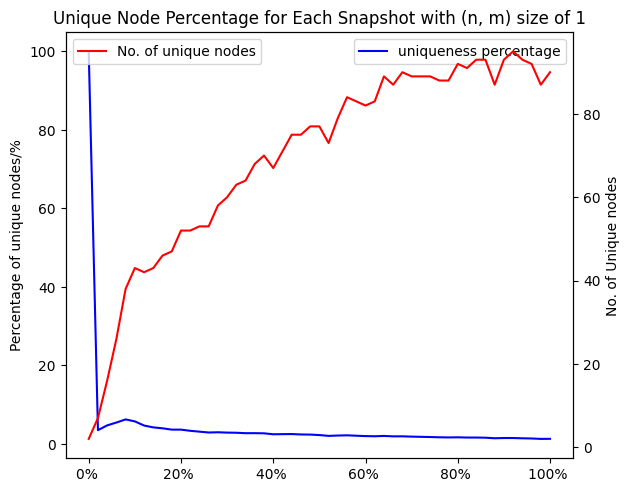

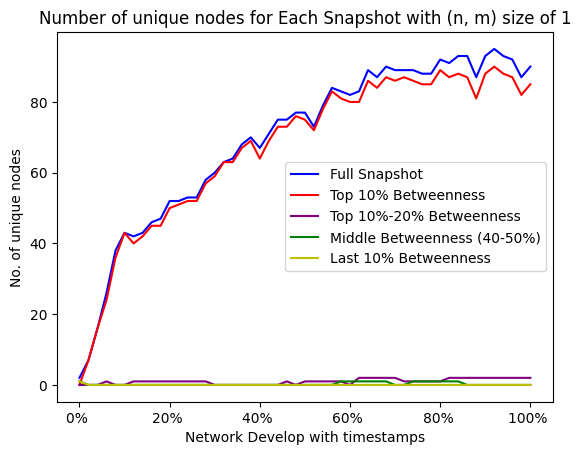

In [12]:
plot_uniquepercent(count, unique_percentage)
plot_uniquecentrality(count, top, mid, last, start)
#plot_uniqueproperty(count, unique_percentage, avg_degree, top_closeness)

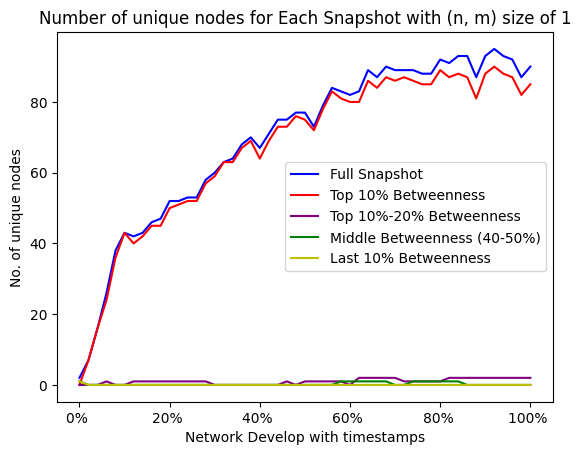

In [53]:
plot_uniquecentrality(count, top, mid, last, start)

In [13]:
# # Save Data
# output_file = 'unique_percentage.txt'

# with open(output_file, 'w') as file:
#     for item in unique_percentage:
#         file.write(f"{item}\n")
        

# Reload Data
# loaded_list = []
# input_file = 'unique_percentage.txt'

# with open(input_file, 'r') as file:
#     for line in file:
#         #loaded_list.append(int(line.strip()))
#         loaded_list.append(line)

with open("unique_percentage.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines = [line.strip() for line in file.readlines()]

# Convert the strings to floats
data_list = [float(line) for line in lines]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


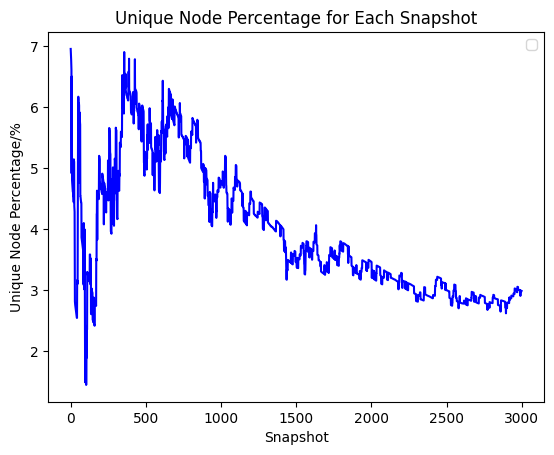

In [17]:
with open("unique_percentage.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines = [line.strip() for line in file.readlines()]

# Convert the strings to floats
unique_percentage = [float(line) for line in lines]

plt.plot(unique_percentage, linestyle='-', color='b')
plt.xlabel('Snapshot')
plt.ylabel('Unique Node Percentage/%')
plt.title('Unique Node Percentage for Each Snapshot')
#plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()

In [16]:
with open("network1_top.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines1 = [line.strip() for line in file.readlines()]

# Convert the strings to floats
top = [float(line) for line in lines1]

with open("network1_mid.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines2 = [line.strip() for line in file.readlines()]

# Convert the strings to floats
mid = [float(line) for line in lines2]

with open("network1_last.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines3 = [line.strip() for line in file.readlines()]

# Convert the strings to floats
last = [float(line) for line in lines3]

In [135]:
# output_file1 = 'network1_top.txt'
# with open(output_file1, 'w') as file:
#     for item in top:
#         file.write(f"{item}\n")
        
# output_file2 = 'network1_mid.txt'
# with open(output_file2, 'w') as file:
#     for item in mid:
#         file.write(f"{item}\n")
        
# output_file3 = 'network1_last.txt'
# with open(output_file3, 'w') as file:
#     for item in last:
#         file.write(f"{item}\n")

### Network 2 Mooc Actions

Sr: 

7047 nodes, 178406 edges

In [13]:
with open('data/mooc_actions.tsv', 'r') as file:
    # ignoring the first row since they are labels
    lines = file.readlines()[1:]

unique_edges = set()
edge_list = []
for line in lines:
    parts = line.split()
    source = int(parts[1])
    target = int(parts[2])
    # Ignore self-edges and repeating edges
    if source != target and (source, target) not in unique_edges:
        edge_list.append((source, target))
        unique_edges.add((source, target))

G = nx.DiGraph()
G.add_edges_from(edge_list)
print(G.number_of_nodes())
print(G.number_of_edges())

# edge_list_file = 'data/mooc_actions.tsv'
# edges2 = []

# with open(edge_list_file, 'r') as file:
#     for line in file:
#         source, target = map(int, line.strip().split(',')[1:3])
#         edge = (source, target)
#         if edge not in edges2:
#             edges2.append(edge)   # dropping repeating edges, each edge only appear once

7047
178406


In [14]:
count2, unique_percentage2 = snapshots_uniqueness(edge_list)
top2, mid2, last2, start2 = snapshots_uniqueness_betweenness(edge_list)

In [92]:
avg_degree2, top_closeness2, density2 = snapshots_properties(edge_list)

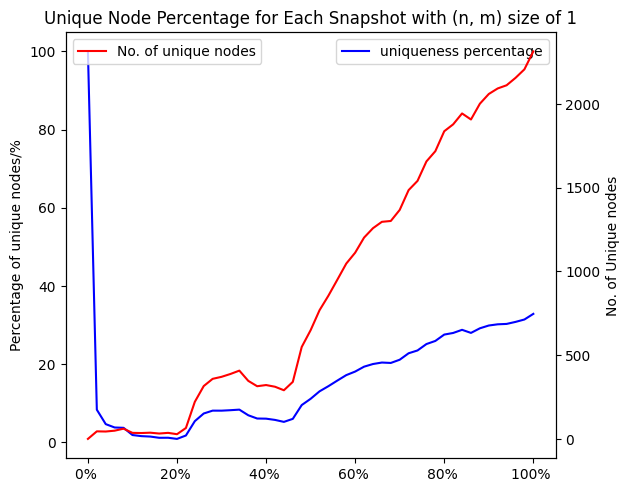

In [15]:
plot_uniquepercent(count2, unique_percentage2)

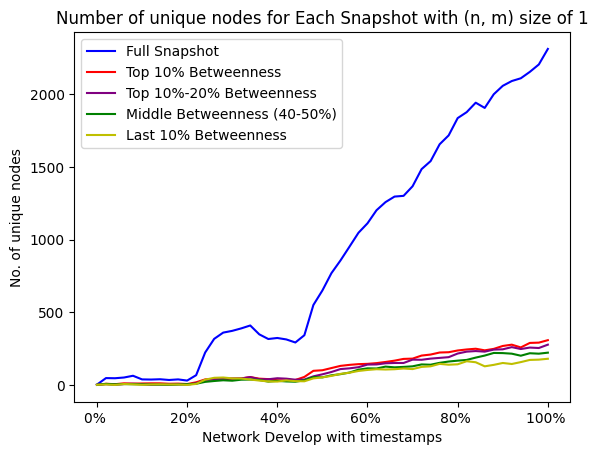

In [54]:
plot_uniquecentrality(count2, top2, mid2, last2, start2)

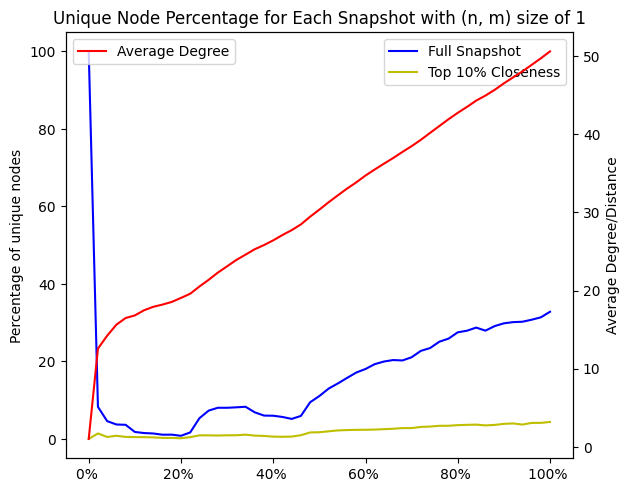

In [94]:
plot_uniqueproperty(count2, unique_percentage2, avg_degree2, top_closeness2)

### Network 3 Contacts Hypertext



In [16]:
edge_list_file = 'data/ia-contacts_hypertext2009.edges'
edges3 = []

with open(edge_list_file, 'r') as file:
    for line in file:
        source, target, _ = map(int, line.strip().split(',')[:3])
        edge = (source, target)
        if edge not in edges3:
            edges3.append(edge)   # dropping repeating edges, each edge only appear once

G = nx.DiGraph()
G.add_edges_from(edges3)
print(G.number_of_nodes())
print(G.number_of_edges())

113
2498


In [17]:
count3, unique_percentage3 = snapshots_uniqueness(edges3)
top3, mid3, last3, start3 = snapshots_uniqueness_betweenness(edges3)

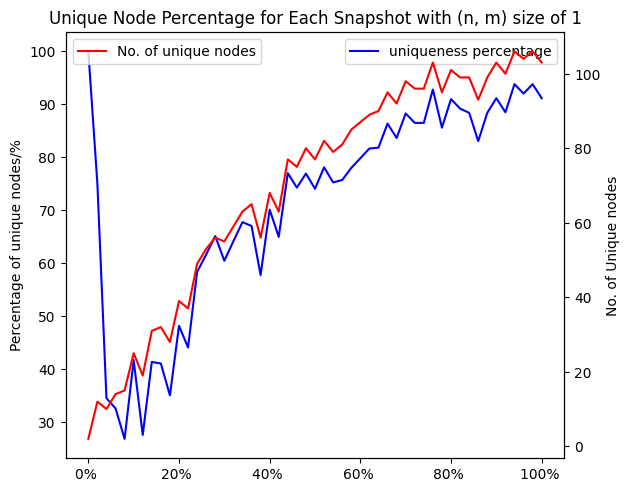

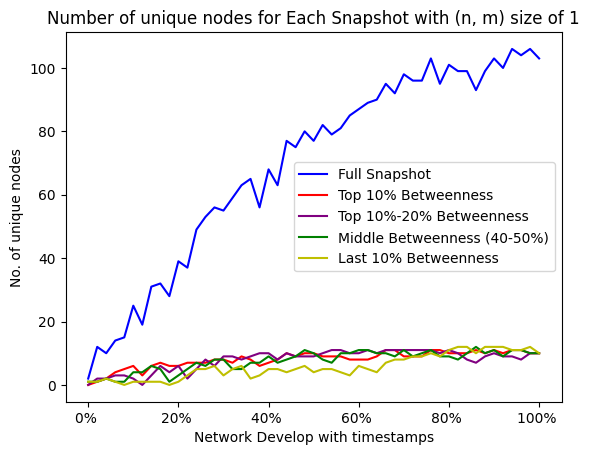

In [18]:
plot_uniquepercent(count3, unique_percentage3)
plot_uniquecentrality(count3, top3, mid3, last3, start3)

### Network 4 Facebook Wall
Friendship relationships and interactions (wall posts) for a subset of the Facebook social network in 2009, recorded over a 2 year period. Edge directed edge represents a post by one user on another user's FB wall.

Sr: https://networks.skewed.de/net/facebook_wall


In [64]:
with open('data/facebook_wall.csv', 'r') as file:
    # ignoring the first row since they are labels
    lines = file.readlines()[1:]

unique_edges = set()
edge_list4 = []
for line in lines:
    parts = line.split(',')
    source = int(parts[0])
    target = int(parts[1])
    # Ignore self-edges and repeating edges
    if source != target and (source, target) not in unique_edges:
        edge_list4.append((source, target))
        unique_edges.add((source, target))

G = nx.DiGraph()
G.add_edges_from(edge_list4)
print(G.number_of_nodes())
print(G.number_of_edges())

45813
264004


In [45]:
count4, unique_percentage4 = snapshots_uniqueness(edge_list4, step=0.05, part=0.5)

1
13201
26401
39601
52801
66001
79201
92401
105601
118801
132001


In [46]:
# 200 min 0.5,0.5
# 23902 nodes, 132001 edges
top4, mid4, last4, start4 = snapshots_uniqueness_betweenness(edge_list4, step=0.05, part=0.5)

1
13201
26401
39601
52801
66001
79201
92401
105601
118801
132001


In [64]:
def plot_uniquepercent_part(count, percent):
    fig, ax1 = plt.subplots()
    #ax1.set_lable('Network Develop with timestamps')
    ax1.set_ylabel('Percentage of unique nodes/%')
    ax1.plot(percent, linestyle='-', color='b', label='uniqueness percentage')

    plt.legend()

    ax2 = ax1.twinx()
    ax2.set_ylabel('No. of Unique nodes')
    ax2.plot(count, linestyle='-', color='r', label='No. of unique nodes')

    fig.tight_layout()
    plt.title('Unique Node Percentage for Each Snapshot with (n, m) size of 1')
    plt.xticks(range(11), [f'{i*10}%' for i in range(11)])
    #plt.xticks(range(0, 11, 1), [f'{i}% ' for i in range(0, 101, 100)])
    # plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
    plt.legend()
    plt.show()  


def plot_uniquecentrality_part(count, top, mid, last, start):
    plt.plot(count, linestyle='-', color='b', label='Full Snapshot')
    plt.plot(top, linestyle='-', color='r', label='Top 10% Betweenness')
    plt.plot(start, linestyle='-', color='purple', label='Top 10%-20% Betweenness')
    plt.plot(mid, linestyle='-', color='g', label='Middle Betweenness (40-50%)')
    plt.plot(last, linestyle='-', color='y', label='Last 10% Betweenness')
    
    plt.xlabel('Network Develop with timestamps')
    plt.ylabel('No. of unique nodes')
    plt.xticks(range(11), [f'{i*10}%' for i in range(11)])
    #plt.xticks(range(0, 51, 10), [f'{i}% ' for i in range(0, 101, 20)])
    plt.title('Number of unique nodes for Each Snapshot with (n, m) size of 1')
    # plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
    plt.legend()
    plt.show()  

In [59]:
data = {
    'Full': count4,
    'Top': top4,
    'Mid1': start4,
    'Mid2': mid4,
    'Last': last4
}
df_save4 = pd.DataFrame(data)
df_save4.to_csv('data/acebookwall.csv', index=False)

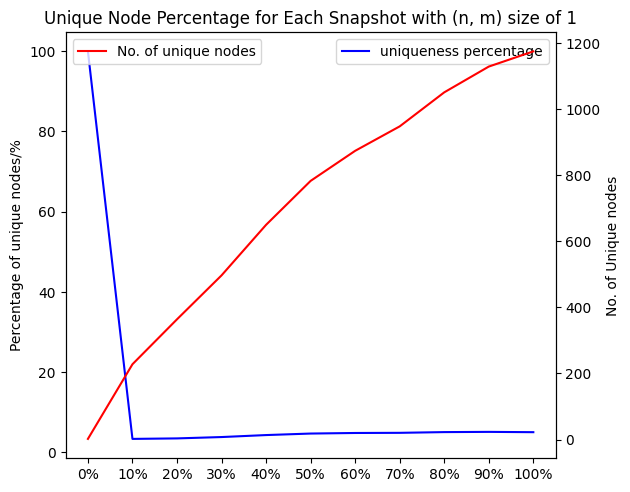

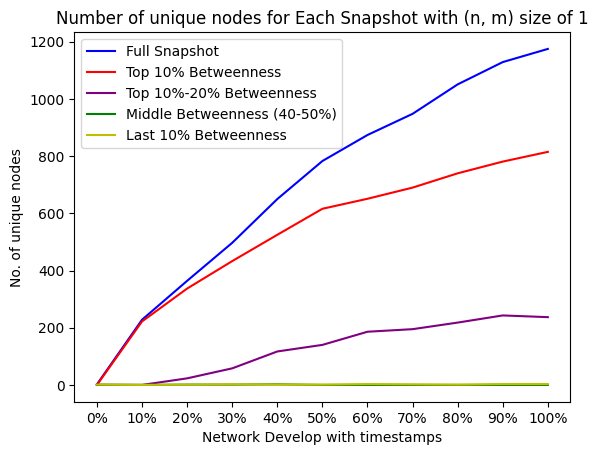

In [65]:
plot_uniquepercent_part(count4, unique_percentage4)
plot_uniquecentrality_part(count4, top4, mid4, last4, start4)

### Dataset 5 Sp Infectious
Sr: https://networks.skewed.de/net/sp_infectious

10972 nodes, 415912 edges

In [63]:
with open('data/sp_infections.csv', 'r') as file:
    # ignoring the first row since they are labels
    lines = file.readlines()[1:]

unique_edges = set()
edge_list5 = []
for line in lines:
    parts = line.split(',')
    source = int(parts[0])
    target = int(parts[1])
    # Ignore self-edges and repeating edges
    if source != target and (source, target) not in unique_edges:
        edge_list5.append((source, target))
        unique_edges.add((source, target))

G = nx.DiGraph()
G.add_edges_from(edge_list5)
print(G.number_of_nodes())
print(G.number_of_edges())

10972
52761


In [75]:
#223min
count5, unique_percentage5 = snapshots_uniqueness(edge_list5)
top5, mid5, last5, start5 = snapshots_uniqueness_betweenness(edge_list5)

1
1056
2111
3166
4221
5276
6331
7386
8441
9496
10551
11606
12661
13716
14771
15826
16881
17936
18991
20046
21101
22156
23211
24266
25321
26376
27431
28486
29541
30596
31651
32706
33761
34816
35871
36926
37981
39036
40091
41146
42201
43256
44311
45366
46421
47476
48531
49586
50641
51696
52751


In [76]:
data = {
    'Full': count5,
    'Top': top5,
    'Mid1': start5,
    'Mid2': mid5,
    'Last': last5
}
df_save5 = pd.DataFrame(data)
df_save5.to_csv('data/sp_infect.csv', index=False)

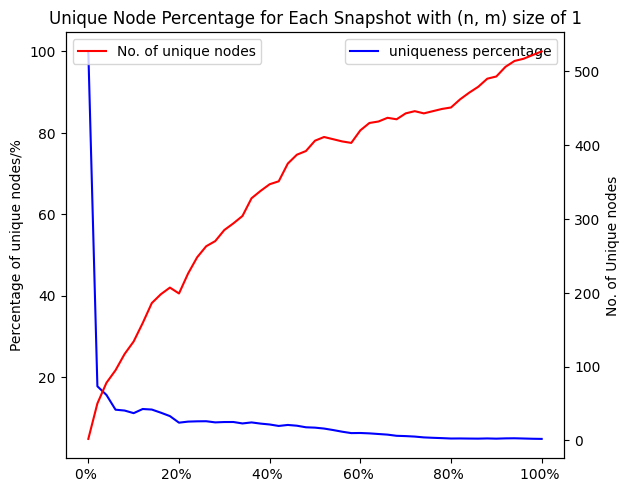

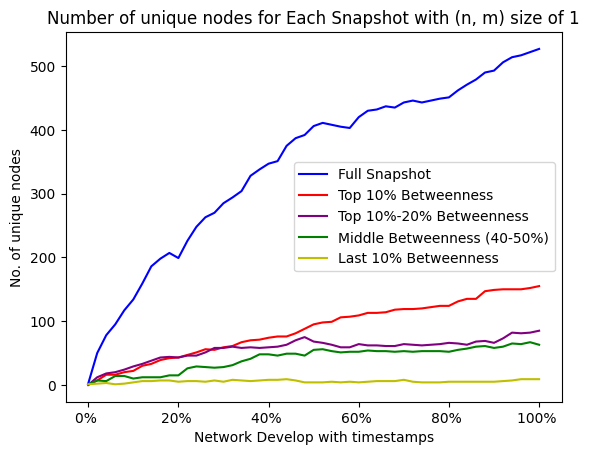

In [77]:
plot_uniquepercent(count5, unique_percentage5)
plot_uniquecentrality(count5, top5, mid5, last5, start5)

### Step 2 Processing - Finding Connections

In [37]:
# Load results of Dataset 4 and 5
big_df = pd.DataFrame()

dataset4 = pd.read_csv("data/acebookwall.csv")
dataset5 = pd.read_csv("data/sp_infect.csv")

# Save results of Dataset 1 to 3
dataset1 = save_result(count, top, mid, last, start)
dataset2 = save_result(count2, top2, mid2, last2, start2)
dataset3 = save_result(count3, top3, mid3, last3, start3)

dataset4['Percent'] = dataset4['Top']/dataset4['Full']
dataset5['Percent'] = dataset5['Top']/dataset5['Full']

C:\Users\Shaoxuan Zhang\AppData\Local\Temp\ipykernel_14836\4044522218.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


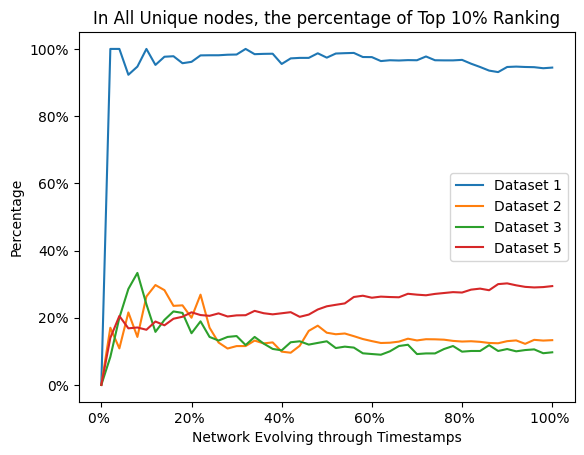

In [61]:
# Plot Top 10% Percentage
plt.plot(dataset1['Percent'], label='Dataset 1')
plt.plot(dataset2['Percent'], label='Dataset 2')
plt.plot(dataset3['Percent'], label='Dataset 3')
plt.plot(dataset5['Percent'], label='Dataset 5')

plt.title('In All Unique nodes, the percentage of Top 10% Ranking')
plt.xlabel('Network Evolving through Timestamps')
plt.xticks(range(0, 51, 10), [f'{i}% ' for i in range(0, 101, 20)])
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.ylabel('Percentage')
plt.legend()
plt.show()


In [69]:
# The other way around, In Top 10%, how much percentage are unique?

# Get no. of nodes for each snapshot then take 10%
edge_list_collection = [edges, edge_list, edges3, edge_list5]
number_top10_nodes = []
for _ in range(len(edge_list_collection)):
    number_top10_nodes.append([])

for i in range(len(edge_list_collection)):
    G = nx.DiGraph()
    G.add_edges_from(edge_list_collection[i])
    M = G.number_of_edges()
    
    for j in range(1, M, int(0.02*M)):
        sub_edge = edge_list_collection[i][:j]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
        n = snapshot.number_of_nodes()
        number_top10_nodes[i].append(int(0.1*n))
    

In [83]:
results0 = [b / a if b != 0 else None for a, b in zip(number_top10_nodes[0], dataset1['Top'].tolist())]
results1 = [b / a if b != 0 else None for a, b in zip(number_top10_nodes[1], dataset2['Top'].tolist())]
results2 = [b / a if b != 0 else None for a, b in zip(number_top10_nodes[2], dataset3['Top'].tolist())]
results3 = [b / a if b != 0 else None for a, b in zip(number_top10_nodes[3], dataset5['Top'].tolist())]

C:\Users\Shaoxuan Zhang\AppData\Local\Temp\ipykernel_14836\127955208.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


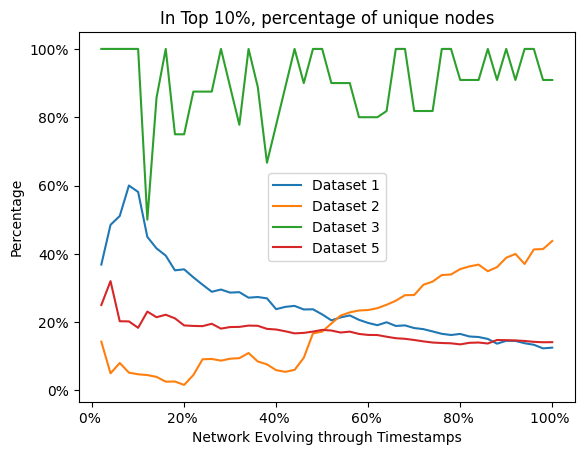

In [85]:
plt.plot(results0, label='Dataset 1')
plt.plot(results1, label='Dataset 2')
plt.plot(results2, label='Dataset 3')
plt.plot(results3, label='Dataset 5')

plt.title('In Top 10%, percentage of unique nodes')
plt.xlabel('Network Evolving through Timestamps')
plt.xticks(range(0, 51, 10), [f'{i}% ' for i in range(0, 101, 20)])
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [88]:
# Func 1: (n,m) Uniquness Count for every snapshot from 0% to 100% network evolving, 2% every snapshot
def snapshots_uniqueness_nor(edges, step=0.02, part=1):
    unique_percentage = []
    count = []
    G = nx.DiGraph()
    G.add_edges_from(edges)
    M = G.number_of_edges()
    
    for i in range(1, int(part*M), int(step*M)):
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
            
        # print("Snapshot", i)
        # print("No. of Nodes:", snapshot.number_of_nodes(), "No. of Edges:",snapshot.number_of_edges())
            
        anonymity_dict, normalized_dict = n_m_anonymity(snapshot)
        unique_count = sum(1 for count in anonymity_dict.values() if count == 1)
        total_nodes = snapshot.number_of_nodes()
        percentage_unique = (unique_count / total_nodes) * 100  
            
        unique_percentage.append(percentage_unique)
        count.append(unique_count)
        #print(i)
    
    return count, unique_percentage, normalized_dict

In [91]:
count, unique_percentage, dict = snapshots_uniqueness_nor(edges)

AttributeError: 'int' object has no attribute 'values'

In [ ]:
dict

AS = weight1 * unique + weight2* betweenness
